In [37]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import random

In [38]:
# Load Linear Train Data
linear_data = []
linear_labels = []
with open('linear/train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # To avoid bad data
        if row['x'] and row['y']:
            linear_data.append(float(row['x']))
            linear_labels.append(float(row['y']))

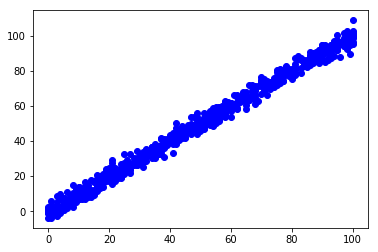

In [39]:
#Plot original data
def plot_data(data, labels):
    plt.plot(data, labels, 'bo')

plot_data(linear_data, linear_labels)

In [40]:
#Generate random point
def generate_random_point(min_val, max_val):
    return random.uniform(min_val, max_val)

#Add random points to the data
def add_random_points(number, data, labels):
    res_data = list(data)
    res_labels = list(labels)
    maxX = max(data)
    minX = min(data)
    maxY = max(labels)
    minY = min(labels)
    for i in range(number):
        rx = generate_random_point(minX, maxX)
        ry = generate_random_point(minY, maxY)
        res_data.append(rx)
        res_labels.append(ry)
    return (res_data, res_labels)

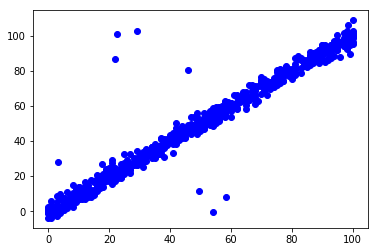

In [46]:
#Add random point to data
(data2, labels2) = add_random_points(10, linear_data, linear_labels)
plot_data(data2, labels2)